<a href="https://colab.research.google.com/github/zahradm/ColabPyspark/blob/main/PysparkInColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data from Kaggle

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Generate kaggle token API

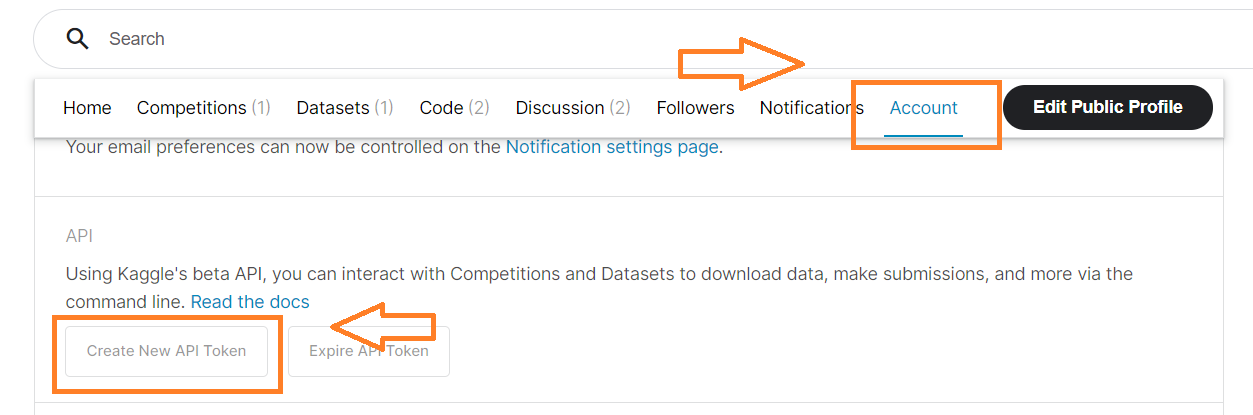

Upload kaggle.json

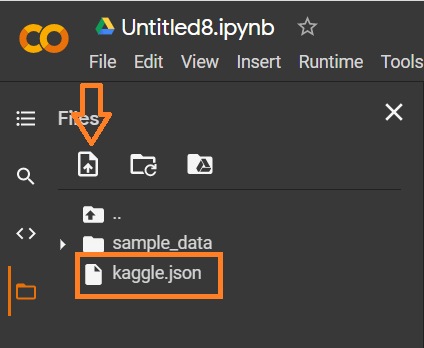

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/aadimator/nyc-realtime-traffic-speed-data")

100%|██████████| 9.61G/9.61G [01:14<00:00, 138MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv("/content/nyc-realtime-traffic-speed-data/DOT_Traffic_Speeds_NBE.csv")

# Pyspark setup

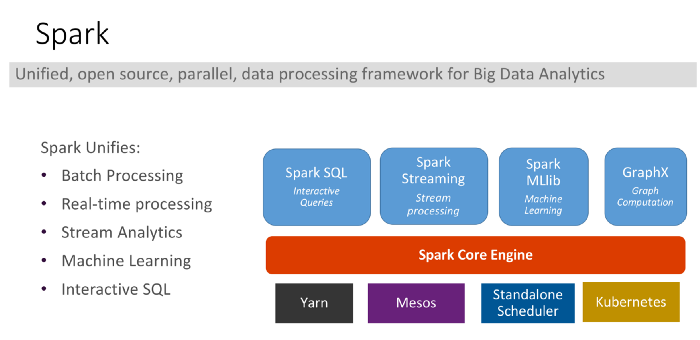


In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [2,970 kB]
Hit:14 http://ppa.launchpad.net/graphics-dri

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Download Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

[Spark download link](https://dlcdn.apache.org/spark/)

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.3-bin-hadoop3.2'

In [ ]:
# Install library for finding Spark
!pip install -q findspark
# Import the libary
import findspark
# Initiate findspark
findspark.init()
# Check the location for Spark
findspark.find()

'/content/spark-3.2.3-bin-hadoop3.2'

# Start with pyspark

In [ ]:
from pyspark.sql import SparkSession
sc = SparkSession.builder.master("local").appName("example").getOrCreate()

In [ ]:
raw_data = sc.read.options(delimiter=",",header=True).csv("/content/nyc-realtime-traffic-speed-data/DOT_Traffic_Speeds_NBE.csv")

In [ ]:
raw_data.show(5)

+---+-----+-----------+------+--------------------+-------+--------------------+--------------------+----------------------+-----------+-----------+---------+--------------------+
| ID|SPEED|TRAVEL_TIME|STATUS|          DATA_AS_OF|LINK_ID|         LINK_POINTS|   ENCODED_POLY_LINE|ENCODED_POLY_LINE_LVLS|      OWNER|TRANSCOM_ID|  BOROUGH|           LINK_NAME|
+---+-----+-----------+------+--------------------+-------+--------------------+--------------------+----------------------+-----------+-----------+---------+--------------------+
|262| 34.8|        359|     0|06/02/2017 11:41:...|4616319|40.6332305,-74.01...|ud_wF|gwbMgCCwATc...|  BBBBBBBBBBBBBBBBB...|NYC_DOT_LIC|    4616319| Brooklyn|GOW S 9TH STREET ...|
|204|55.92|        155|     0|06/02/2017 11:41:...|4616320|40.7894406,-73.78...|_u}wFhkjaMr@dI~A~...|  BBBBBBBBBBBBBBBBB...|NYC_DOT_LIC|    4616320|   Queens|CIP N TNB - White...|
|106|39.77|        159|     0|06/02/2017 11:41:...|4616323|40.77158,-73.9944...|kezwFf`sbMv@TxAVn...

In [ ]:
raw_data.printSchema()

root
 |-- ID: string (nullable = true)
 |-- SPEED: string (nullable = true)
 |-- TRAVEL_TIME: string (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- DATA_AS_OF: string (nullable = true)
 |-- LINK_ID: string (nullable = true)
 |-- LINK_POINTS: string (nullable = true)
 |-- ENCODED_POLY_LINE: string (nullable = true)
 |-- ENCODED_POLY_LINE_LVLS: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- TRANSCOM_ID: string (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- LINK_NAME: string (nullable = true)



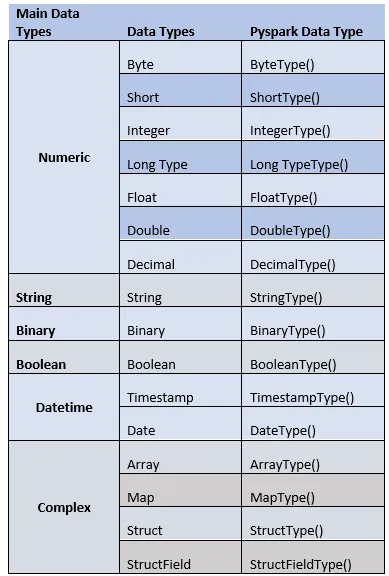

In [ ]:
from pyspark.sql.types import TimestampType, IntegerType

integer_type = ['SPEED', 'TRAVEL_TIME']
timestamp_type = ['DATA_AS_OF']

for c in timestamp_type:
  raw_data = raw_data.withColumn(c, raw_data[c].cast(TimestampType()))

for c in integer_type:
  raw_data = raw_data.withColumn(c, raw_data[c].cast(IntegerType()))

In [ ]:
raw_data.printSchema()

root
 |-- ID: string (nullable = true)
 |-- SPEED: integer (nullable = true)
 |-- TRAVEL_TIME: integer (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- DATA_AS_OF: timestamp (nullable = true)
 |-- LINK_ID: string (nullable = true)
 |-- LINK_POINTS: string (nullable = true)
 |-- ENCODED_POLY_LINE: string (nullable = true)
 |-- ENCODED_POLY_LINE_LVLS: string (nullable = true)
 |-- OWNER: string (nullable = true)
 |-- TRANSCOM_ID: string (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- LINK_NAME: string (nullable = true)



In [34]:
type(raw_data)

pyspark.sql.dataframe.DataFrame

In [ ]:
dir(raw_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_collect_as_arrow',
 '_jcols',
 '_jdf',
 '_jmap',
 '_jseq',
 '_lazy_rdd',
 '_repr_html_',
 '_sc',
 '_schema',
 '_sort_cols',
 '_support_repr_html',
 '_to_corrected_pandas_type',
 'agg',
 'alias',
 'approxQuantile',
 'cache',
 'checkpoint',
 'coalesce',
 'colRegex',
 'collect',
 'columns',
 'corr',
 'count',
 'cov',
 'createGlobalTempView',
 'createOrReplaceGlobalTempView',
 'createOrReplaceTempView',
 'createTempView',
 'crossJoin',
 'crosstab',
 'cube',
 'describe',
 'distinct',
 'drop',
 'dropDuplicates',
 'drop_duplicates',
 'dropna',
 'dtypes',
 'exceptAll',
 'explain',
 'fillna',
 'fi

In [ ]:
raw_data.count()

64914523

In [ ]:
raw_data.describe().show()

+-------+------------------+------------------+------------------+-------------------+------------------+--------------------+--------------------+----------------------+--------------------+------------------+-------------+--------------------+
|summary|                ID|             SPEED|       TRAVEL_TIME|             STATUS|           LINK_ID|         LINK_POINTS|   ENCODED_POLY_LINE|ENCODED_POLY_LINE_LVLS|               OWNER|       TRANSCOM_ID|      BOROUGH|           LINK_NAME|
+-------+------------------+------------------+------------------+-------------------+------------------+--------------------+--------------------+----------------------+--------------------+------------------+-------------+--------------------+
|  count|          64914523|          64914523|          64914523|           64914523|          64914523|            64914523|            64914523|              64914523|            64914523|          64914523|     64914523|            64914523|
|   mean| 288.90

In [35]:
sc.stop()

# Resources


*   https://www.kaggle.com/datasets/aadimator/nyc-realtime-traffic-speed-data
*   https://medium.com/bild-journal/pyspark-data-types-explained-feb5e6f83c43

